# Non-linearity
- Non-linearity allows the neural network to learn and represent more complex and expressive functions.
- Without non-linearity, a neural network would only be able to solve linear problems, which are relatively simple and can be solved by other algorithms.
- Non-linear activation functions like sigmoid, tanh, ReLU, etc. allow the neural network to learn non-linear decision boundaries, which can separate the data that is not linearly separable.
- Non-linearity is important for training deeper networks, as it prevents gradients from getting smaller as the backpropagation goes deeper, which can cause the network to stop learning.

**In summary,** non-linearity is necessary for solving non-linear problems and allows the neural network to learn more complex functions.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import torch
import numpy as np
import pandas as pd
from torch import tensor

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Get data

In [6]:
!gdown 1a4TCpVXvqyVhIGfULqCOg4COejFtcZrk
!gdown 1q_WCC0aLa0Xyyz6Um2_y2BDW6rjEfaHE

Downloading...
From: https://drive.google.com/uc?id=1a4TCpVXvqyVhIGfULqCOg4COejFtcZrk
To: /content/adult_train.csv
100% 4.60M/4.60M [00:00<00:00, 139MB/s]
Downloading...
From: https://drive.google.com/uc?id=1q_WCC0aLa0Xyyz6Um2_y2BDW6rjEfaHE
To: /content/adult_test.csv
100% 1.15M/1.15M [00:00<00:00, 114MB/s]


In [7]:
train_df = pd.read_csv("adult_train.csv")
test_df = pd.read_csv("adult_test.csv")
train_df.head()

,age,fnlwgt,educational-num,hours-per-week,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US,high_income
0,71,77253,9,17,0.0,0.0,True,0,1,0,...,False,True,False,False,False,False,True,True,True,False
1,17,329783,6,10,0.0,0.0,True,0,0,1,...,False,False,True,False,False,False,True,False,True,False
2,27,91257,9,40,0.0,0.0,True,0,1,0,...,True,False,False,False,False,False,True,True,False,False
3,43,125577,9,40,0.0,0.0,True,0,1,0,...,False,False,False,False,True,False,False,False,True,False
4,31,137978,13,40,0.0,0.0,True,0,1,0,...,True,False,False,False,False,False,True,True,True,False


In [8]:
train_feature_df = train_df[train_df.columns[:-1]].astype(float)
train_features = tensor(train_feature_df.values, dtype=torch.float)
train_labels = tensor(train_df.high_income, dtype=torch.int)

max_value, _ = train_features.max(dim=0)
train_features /= max_value

In [9]:
test_feature_df = test_df[test_df.columns[:-1]].astype(float)
test_features = tensor(test_feature_df.values, dtype=torch.float)
test_labels = tensor(test_df.high_income, dtype=torch.int)

max_value, _ = test_features.max(dim=0)
test_features /= max_value

In [10]:
def calculate_preds(weights, features):
  mults = (features * weights)
  preds = mults.sum(axis=1)
  return preds

In [11]:
def accuracy(weights, features):
  preds = calculate_preds(weights, features)
  results = test_labels == (preds > 0.5).int()
  return results.float().mean()

#load the linaer weights that we have saved previously in drive

In [16]:
!gdown 1cNqUWi169p__BOdCw_gTv8yj4rzvYeu1

Downloading...
From: https://drive.google.com/uc?id=1cNqUWi169p__BOdCw_gTv8yj4rzvYeu1
To: /content/linear_model_weights.pt
100% 1.31k/1.31k [00:00<00:00, 5.43MB/s]


In [17]:
trained_weights = torch.load("linear_model_weights.pt")

<ipython-input-17-9bca8cefdb8d>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_weights = torch.load("linear_model_weights.pt")


In [18]:
accuracy(trained_weights, test_features)

tensor(0.7264)

# Introducing Sigmoid

Sigmoid stands for $\sigma = \frac{1}{1+e^{-x}}$

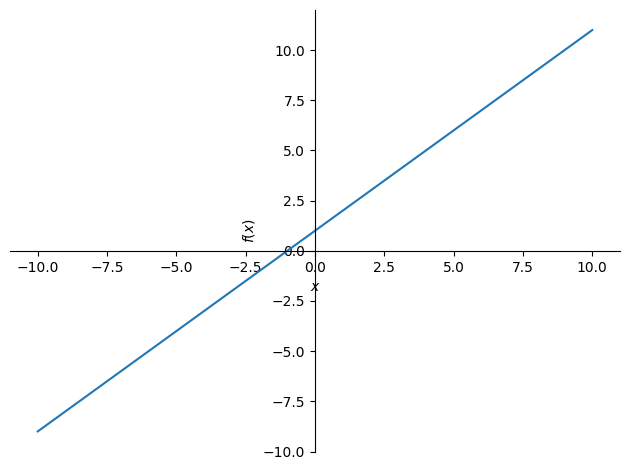

In [24]:
# import sympy # symbolic python
# sympy.plot("x+1", xlim=(-10,10))

import sympy as sp

x = sp.symbols('x')  # Define the symbolic variable
expr = x + 1  # Define the expression

sp.plot(expr, (x, -10, 10))  # Properly specify the range


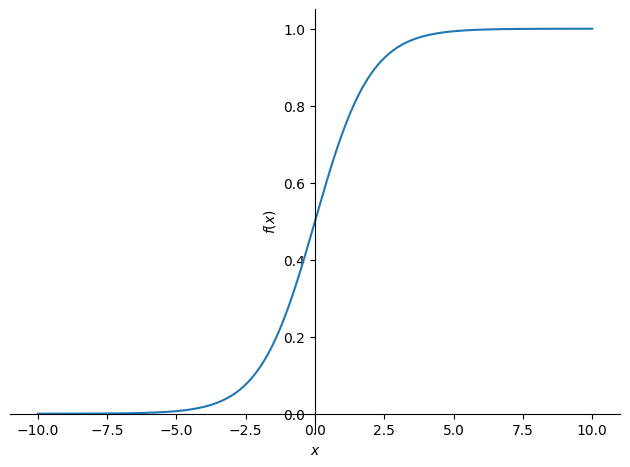

In [26]:
x = sp.symbols('x')
expr = 1/(1+sp.exp(-x))

sp.plot(expr, (x, -10, 10))


# Using Sigmoid to retrain the model

In [29]:
def init_weights():
  torch.manual_seed(42)
  n_params = train_features.shape[1]
  weights = torch.rand(n_params)
  return weights.requires_grad_()

In [30]:
def calculate_preds(weights, features):
  mults = features @ weights # @ means matrix multiplication
  preds = torch.sigmoid(mults)
  return preds

In [31]:
def calculate_loss(preds, labels):
  return torch.abs(preds-labels).mean()

In [32]:
def update_weights(weights, lr):
  weights.sub_(weights.grad * lr)
  return

In [33]:
def one_epoch(epoch_no, weights, lr):
  preds = calculate_preds(weights, train_features)
  loss = calculate_loss(preds, train_labels)
  loss.backward()
  with torch.no_grad(): update_weights(weights, lr)
  print(f"Epoch {epoch_no+1} => Loss: {loss}")

In [34]:
def train_model(epochs, lr):
  weights = init_weights()
  for epoch_no in range(epochs):
    one_epoch(epoch_no, weights, lr)
  return weights

In [35]:
weights = train_model(epochs=15, lr=2)

Epoch 1 => Loss: 0.7542339563369751
Epoch 2 => Loss: 0.7539462447166443
Epoch 3 => Loss: 0.7533162236213684
Epoch 4 => Loss: 0.7522116303443909
Epoch 5 => Loss: 0.7503570914268494
Epoch 6 => Loss: 0.7471655607223511
Epoch 7 => Loss: 0.7412629723548889
Epoch 8 => Loss: 0.7289184331893921
Epoch 9 => Loss: 0.6978182196617126
Epoch 10 => Loss: 0.6009695529937744
Epoch 11 => Loss: 0.369525283575058
Epoch 12 => Loss: 0.25718405842781067
Epoch 13 => Loss: 0.24191097915172577
Epoch 14 => Loss: 0.2397891879081726
Epoch 15 => Loss: 0.23940058052539825


In [43]:
%cd /content/drive/MyDrive/MasterCourseML/week-10/updated weights

/content/drive/MyDrive/MasterCourseML/week-10/updated weights


In [44]:
torch.save(weights, "sigmoid_model_weights.pt")    #the weights will save according the the path that i have given in previous cell

In [45]:
test_preds = calculate_preds(weights, test_features)
test_preds[:10]

tensor([7.9513e-06, 6.6415e-07, 3.6982e-07, 1.5656e-08, 2.4221e-07, 1.3543e-08,
        7.5821e-09, 1.2796e-08, 1.1918e-08, 3.9680e-06],
       grad_fn=<SliceBackward0>)

In [46]:
def accuracy(weights, features):
  preds = calculate_preds(weights, features)
  results = test_labels == (preds > 0.5).int()
  return results.float().mean()

In [47]:
accuracy(weights, test_features)

tensor(0.7607)

*Model Accuracy after adding sigmoid* **76.07%**